<a href="https://colab.research.google.com/github/praveendhac/aiml-iisc-assignments/blob/main/assignment1/bangalore_rainfall_unmodified_pd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bangalore Rainfall Data Analysis

Import Python Libraries

In [26]:
import pandas as pd
from scipy import stats
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Load Data

In [31]:
df_unmodified = pd.read_csv('bangalore-rainfall-data-1900-2024-sept-unmodified.csv')
print('rows x columns', df_unmodified.shape)
df_unmodified.head()
#df_unmodified.info()

rows x columns (124, 14)


,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,1901,0.0,78.9,0.0,24.3,146.0,47.7,71.6,71.6,318.5,120.3,37.3,23.1,939.3
1,1902,0.7,0.0,17.0,58.1,197.8,62.2,32.0,79.5,213.6,219.9,11.1,25.4,917.3
2,1903,0.0,0.0,0.0,1.5,63.7,109.2,27.9,189.7,475.2,171.1,233.6,29.4,1301.3
3,1904,0.5,0.0,0.0,14.4,241.5,49.5,149.3,53.8,126.4,157.2,0.0,1.7,794.3
4,1905,1.7,0.0,56.6,32.7,90.6,60.7,58.9,266.4,62.4,227.8,29.2,3.0,890.0


<Axes: >

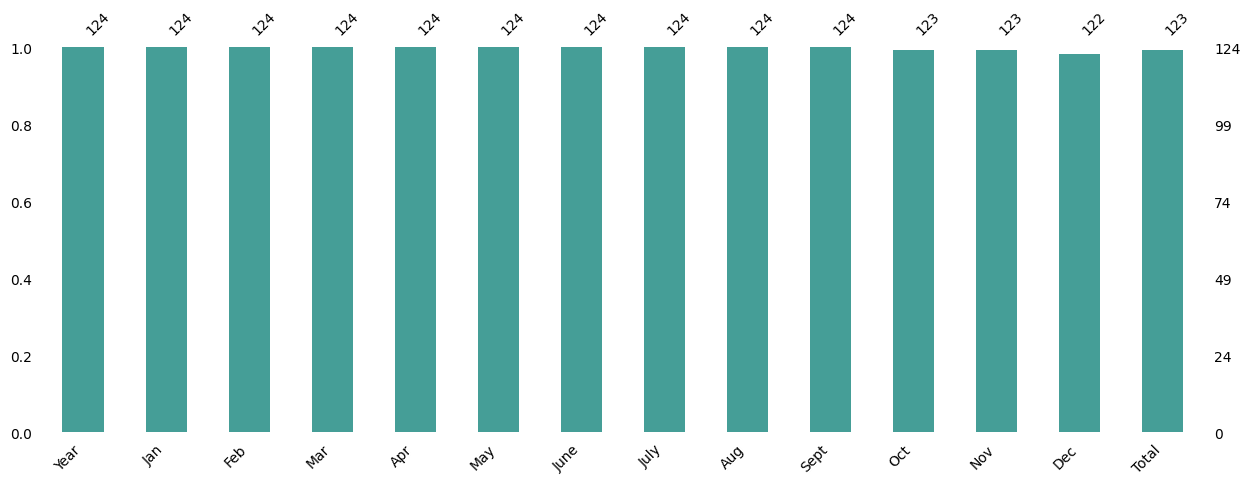

In [32]:
# check all bars are filled or not
msno.bar(df_unmodified, figsize=(15,5), fontsize=10, color='#459E97')

In [33]:
df_unmodified.describe()

,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,123.000000,123.000000,122.000000,123.000000
mean,1962.500000,4.358065,7.439516,11.484677,50.041129,118.364516,84.793548,111.095161,139.916935,187.126613,164.631707,62.243902,16.936885,958.696748
std,35.939764,10.938610,17.319061,21.105315,52.261934,58.161339,50.749568,62.436141,85.760164,106.495490,102.517605,64.224130,23.275519,232.471382
min,1901.000000,0.000000,0.000000,0.000000,0.000000,1.300000,4.500000,18.500000,12.600000,8.300000,3.200000,0.000000,0.000000,543.800000
25%,1931.750000,0.000000,0.000000,0.000000,12.475000,74.975000,54.800000,66.350000,74.225000,105.975000,88.800000,19.850000,1.000000,794.800000
50%,1962.500000,0.000000,0.000000,1.300000,30.950000,111.050000,75.550000,99.850000,120.000000,173.600000,157.200000,37.300000,7.250000,945.300000
75%,1993.250000,4.100000,4.500000,13.850000,75.375000,152.950000,101.550000,141.600000,178.750000,243.375000,205.550000,85.950000,21.775000,1080.000000
max,2024.000000,101.800000,89.900000,115.400000,323.800000,305.500000,255.500000,350.200000,387.100000,516.600000,522.200000,296.400000,119.200000,1957.700000


In [34]:
df_unmodified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    124 non-null    int64  
 1   Jan     124 non-null    float64
 2   Feb     124 non-null    float64
 3   Mar     124 non-null    float64
 4   Apr     124 non-null    float64
 5   May     124 non-null    float64
 6   June    124 non-null    float64
 7   July    124 non-null    float64
 8   Aug     124 non-null    float64
 9   Sept    124 non-null    float64
 10  Oct     123 non-null    float64
 11  Nov     123 non-null    float64
 12  Dec     122 non-null    float64
 13  Total   123 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.7 KB


In [35]:
# Q4: top 5 wettest year from the range of 1900 to 2025
top_5_largest = df_unmodified.nlargest(5, 'Total')

# Print the result
print(top_5_largest)

     Year   Jan   Feb   Mar    Apr    May   June   July    Aug   Sept    Oct  \
121  2022   3.9   0.0   0.0   61.4  270.2  255.5  136.7  378.7  353.0  296.5   
116  2017   0.2   0.0  47.8   30.4  241.9   25.1   59.0  351.8  513.8  385.7   
120  2021  21.2  10.3   0.0  118.2  130.7   91.1  203.3   98.3  188.5  366.3   
97   1998   0.0   0.0   0.1   95.0  110.3   60.7  257.7  387.1  235.3  215.4   
104  2005   1.6   4.4  13.4   75.1  115.7  127.9  136.4  194.0  173.5  446.0   

       Nov   Dec   Total  
121   59.8  74.7  1957.7  
116   20.6  19.7  1696.0  
120  277.8   5.4  1511.1  
97    49.6  20.6  1431.8  
104   56.5   6.3  1350.8  


In [61]:
# Q3: Which month has the highest variance in rainfall over the year?
#col_variance = df_unmodified.var() # .var automatically excludes null or NA/NaN values
col_variance = df_unmodified.drop(['Year', 'Total'], axis=1).var()

print(f'Variance of all columns is \n {col_variance}')
highest_variance_column_name = col_variance.idxmax()
highest_variance_value = col_variance.max()
print(f"Column with the highest variance: {highest_variance_column_name}")
print(f"Highest variance value: {highest_variance_value}")

# sort variances in descending order and select the top three
top_three_variances = col_variance.sort_values(ascending=False).head(3)
print('Top three columns with the highest variance')
print(top_three_variances)

Variance of all columns is 
 Jan       119.653186
Feb       299.949889
Mar       445.434316
Apr      2731.309758
May      3382.741332
June     2575.518657
July     3898.271684
Aug      7354.805808
Sept    11341.289286
Oct     10509.859396
Nov      4124.738876
Dec       541.749785
dtype: float64
Column with the highest variance: Sept
Highest variance value: 11341.289285995283
Top three columns with the highest variance
Sept    11341.289286
Oct     10509.859396
Aug      7354.805808
dtype: float64


In [65]:
# Q1: Which month has the highest number of missing data?
missing_values_count = df_unmodified.drop(['Year', 'Total'], axis=1).isnull().sum().sort_values(ascending=False)
print(f"\nMissing values count: \n{missing_values_count}")
missing_values_count
column_with_max_missing = missing_values_count.idxmax()
print(f"\nColumn with the single highest number of missing values: {column_with_max_missing}")


Missing values count: 
Dec     2
Oct     1
Nov     1
Jan     0
Apr     0
Mar     0
Feb     0
May     0
Aug     0
July    0
June    0
Sept    0
dtype: int64

Column with the single highest number of missing values: Dec


In [63]:
# Q2: In which month is the average rainfall the highest
#df_unmodified.drop(['Year', 'Total'], axis=1).max().sort_values()
df_unmodified.drop(['Year', 'Total'], axis=1).mean().sort_values()


,0
Jan,4.358065
Feb,7.439516
Mar,11.484677
Dec,16.936885
Apr,50.041129
Nov,62.243902
June,84.793548
July,111.095161
May,118.364516
Aug,139.916935


In [64]:
# Q5. Which month has the lowest coefficient of variation?
cv = (df_unmodified.std()/df_unmodified.mean()) * 100
cv.sort_values()

,0
Year,1.831326
Total,24.248688
May,49.137479
July,56.200594
Sept,56.910927
June,59.850742
Aug,61.293627
Oct,62.270875
Nov,103.181400
Apr,104.437960


In [68]:
# Q6: Which month has the highest number of NaN data?
missing_values_count = df_unmodified.drop(['Year', 'Total'], axis=1).isna().sum().sort_values(ascending=False)
print(f"\nMissing values count: \n{missing_values_count}")
missing_values_count
column_with_max_missing = missing_values_count.idxmax()
print(f"\nColumn with the single highest number of missing values: {column_with_max_missing}")


Missing values count: 
Dec     2
Oct     1
Nov     1
Jan     0
Apr     0
Mar     0
Feb     0
May     0
Aug     0
July    0
June    0
Sept    0
dtype: int64

Column with the single highest number of missing values: Dec


In [ ]:
# has to replace the value otherwise mean will ne NaN
#df_unmodified.fillna(df_unmodified.mean(), inplace=True)

<Axes: >

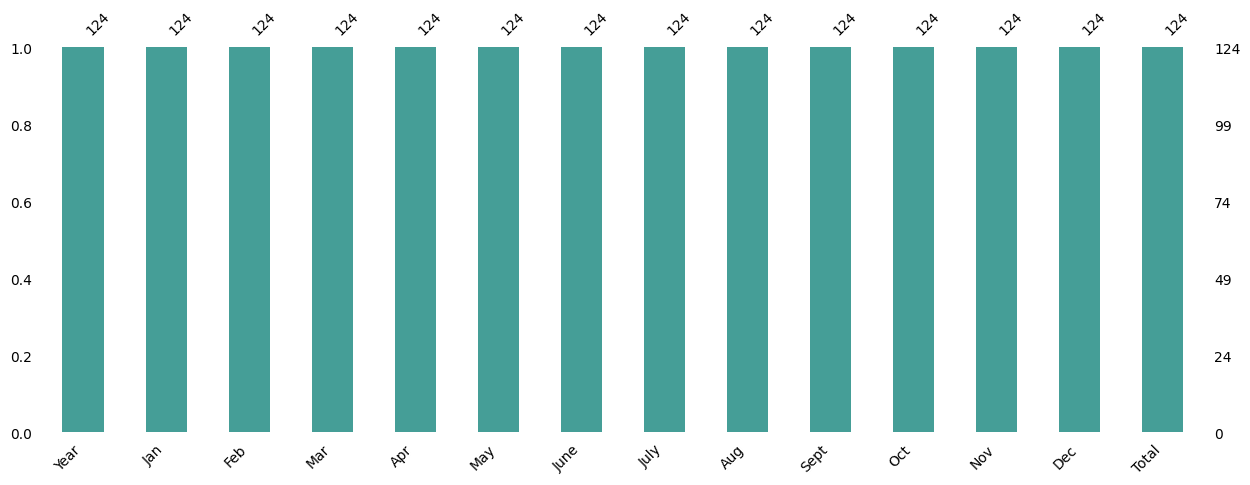

In [24]:
# check all bars are filled or not
msno.bar(df_unmodified, figsize=(15,5), fontsize=10, color='#459E97')

In [25]:
total_rainfall_unmodified = df_unmodified['Total']
print('Total Rainfall in Bangalore is:\n', total_rainfall_unmodified)

# calculate mean total rainfall
mean_rainfall_unmodified = stats.tmean(total_rainfall_unmodified)

print('Mean Total Rainfall in Bangalore is:', mean_rainfall_unmodified)

Total Rainfall in Bangalore is:
 0       939.300000
1       917.300000
2      1301.300000
3       794.300000
4       890.000000
          ...     
119    1212.800000
120    1511.100000
121    1957.700000
122    1020.200000
123     958.696748
Name: Total, Length: 124, dtype: float64
Mean Total Rainfall in Bangalore is: 958.6967479674796


In [27]:
df_modified = pd.read_csv('bangalore-rainfall-data-1900-2024-sept-modified.csv')
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    124 non-null    int64  
 1   Jan     105 non-null    float64
 2   Feb     96 non-null     float64
 3   Mar     103 non-null    float64
 4   Apr     98 non-null     float64
 5   May     98 non-null     float64
 6   June    101 non-null    float64
 7   July    98 non-null     float64
 8   Aug     101 non-null    float64
 9   Sept    98 non-null     float64
 10  Oct     93 non-null     float64
 11  Nov     123 non-null    float64
 12  Dec     122 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 12.7 KB
